<a href="https://colab.research.google.com/github/bhoomikalohan/new-repository/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving adult.zip to adult.zip


In [2]:
import zipfile
import os

# Replace 'your_file.zip' with the actual file name
zip_file = 'adult.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')  # Extract to a folder named 'extracted_data'

# List the contents of the extracted folder
os.listdir('extracted_data')


['adult.names', 'adult.data', 'old.adult.names', 'Index', 'adult.test']

In [ ]:
import pandas as pd

# Replace 'dataset.csv' with the actual file name from the extracted data
df = pd.read_csv('extracted_data/dataset.csv')

# Display the first few rows of the dataframe
df.head()


In [4]:
import zipfile

# Replace 'your_file.zip' with the actual uploaded zip file name
zip_file = 'adult.zip'

# Open the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # List all files in the zip archive
    file_list = zip_ref.namelist()
    print("Files in the zip archive:")
    for file_name in file_list:
        print(file_name)


Files in the zip archive:
Index
adult.data
adult.names
adult.test
old.adult.names


In [5]:
with open('extracted_data/adult.names', 'r') as file:
    print(file.read())


| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [6]:
import pandas as pd

# Specify column names based on the 'adult.names' file
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load the dataset
df = pd.read_csv('extracted_data/adult.data', header=None, names=column_names, skipinitialspace=True)

# Display the first few rows
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
!pip install numpy pandas scikit-learn matplotlib seaborn


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Specify column names based on the 'adult.names' file
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load dataset
df = pd.read_csv('extracted_data/adult.data', header=None, names=column_names, skipinitialspace=True)

# Handling missing values (if any)
df = df.dropna()

# Define categorical and numerical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),  # sparse=False for PCA
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Apply preprocessing and PCA
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),  # Adjust number of components as needed
])

df_pca = pipeline.fit_transform(df.drop('income', axis=1)) # Drop 'income' column if it's not numerical

In [12]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Assuming 'df_pca' from your previous cell contains the preprocessed data
# K-Means
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(df_pca) # Use df_pca here

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(df_pca) # Use df_pca here

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca) # Use df_pca here

In [13]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming 'df_pca' from your previous cell contains the preprocessed data
# and 'kmeans_labels', 'agg_labels', 'dbscan_labels' are the cluster labels

# Silhouette Score
silhouette = silhouette_score(df_pca, kmeans_labels)  # Use df_pca here
print(f'Silhouette Score: {silhouette}')

# Calinski-Harabasz Index
calinski = calinski_harabasz_score(df_pca, kmeans_labels)  # Use df_pca here
print(f'Calinski-Harabasz Index: {calinski}')

# Davies-Bouldin Index
davies = davies_bouldin_score(df_pca, kmeans_labels)  # Use df_pca here
print(f'Davies-Bouldin Index: {davies}')

Silhouette Score: 0.3901521157370502
Calinski-Harabasz Index: 23173.940046335883
Davies-Bouldin Index: 0.8778804411080422


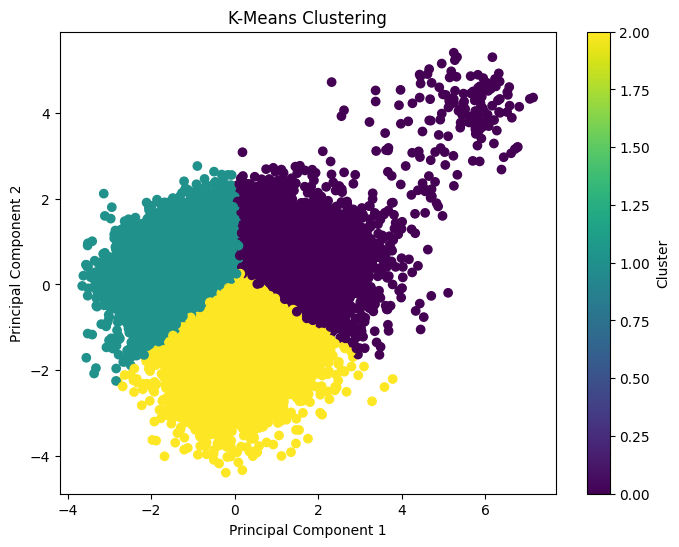

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Convert kmeans_labels to a NumPy array if it's not already
kmeans_labels = np.array(kmeans_labels)

# Create scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')  # Add colorbar to show cluster mapping
plt.show()